      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


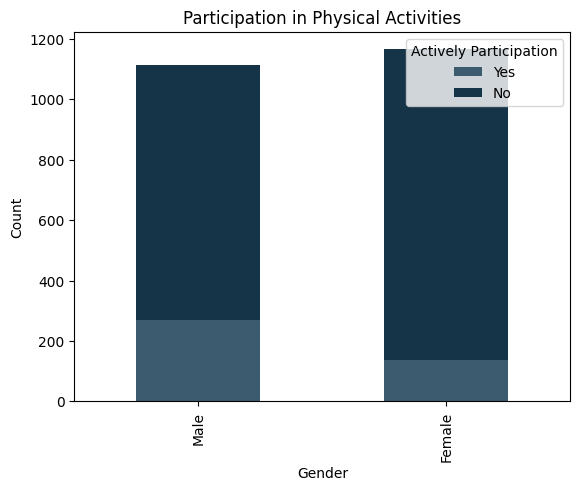

c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the ma

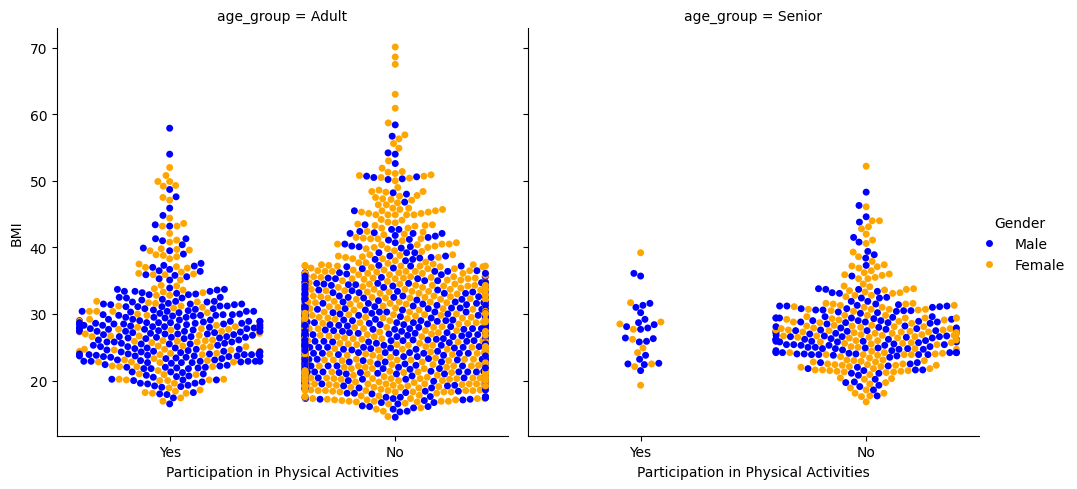

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

agePrediction = pd.read_csv("./agePrediction.csv")
print(agePrediction.head())


# Define custom gender labels
gender_labels = {1: 'Male', 2: 'Female'}

# Pivot the data to prepare for stacked bar plot
pivot_data = agePrediction.groupby(['RIAGENDR', 'PAQ605']).size().unstack()

# Set a custom color palette
custom_palette = ["#3C5B6F", "#153448"]  # Sky Blue and Salmon colors

# Plot stacked bar plot with custom color palette
pivot_data.plot(kind='bar', stacked=True, color=custom_palette)

# Set axis labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Participation in Physical Activities')

# Replace numeric x-axis labels with custom gender labels
plt.xticks(ticks=[0, 1], labels=[gender_labels[1], gender_labels[2]])

# Display the plot
plt.legend(title='Actively Participation', labels=['Yes', 'No'])
plt.show()




# Multivariate Analysis

# Map values in the "PAQ605" column to the desired labels
agePrediction['PAQ605_label'] = agePrediction['PAQ605'].map({1.0: 'Yes', 2.0: 'No'})

# Assuming agePrediction is your DataFrame containing the data
filtered_data = agePrediction[agePrediction['PAQ605'].isin([1, 2])]

# Create the catplot with custom order for x-axis values
cat_plot = sns.catplot(data=filtered_data, kind='swarm', x='PAQ605_label', y='BMXBMI', hue='RIAGENDR', col='age_group', order=['Yes', 'No'], estimator=np.mean, palette=['blue', 'orange'])

# Set the axis labels
cat_plot.set_axis_labels("Participation in Physical Activities", "BMI")

# Customize legend labels
cat_plot._legend.set_title("Gender")
new_labels = ['Male', 'Female']
for t, l in zip(cat_plot._legend.texts, new_labels):
    t.set_text(l)

plt.show()

